In [3]:
!pip install yfinance

In [4]:
import yfinance as yf
import pandas as pd

# Create an object for Tesla
tesla = yf.Ticker("TSLA")

# Obtain stock data for Tesla with the period set to 'max'
tesla_data = tesla.history(period='max')

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [12]:
!pip install requests
!pip install beautifulsoup4

import pandas as pd
from bs4 import BeautifulSoup
import requests

# URL of the webpage containing Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/tesla_revenue_data.html"


# Download the webpage
response = requests.get(url)
html_data = response.text

# Parse the HTML data
soup = BeautifulSoup(html_data, 'lxml-xml')

# Initialize an empty DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Locate the correct table (adjust this based on your inspection of the HTML)
table = soup.find("table")  # This finds the first table in the HTML

if table:
    # Extract data from the table rows
    for row in table.find("tbody").find_all("tr"):
        col = row.find_all("td")
        
        if len(col) >= 2:  # Ensure there are enough columns
            # Extract data from the columns
            date = col[0].text.strip()  # Adjust index according to the table structure
            revenue = float(col[1].text.strip().replace(',', '').replace('$', ''))  # Clean and convert revenue

            # Append to the DataFrame
            tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)
else:
    print("Table not found in the HTML.")

# Display the last five rows
print(tesla_revenue.tail())


Table not found in the HTML.
Empty DataFrame
Columns: [Date, Revenue]
Index: []


In [13]:
import yfinance as yf
import pandas as pd

# Step 1: Create a Ticker object for GameStop
gme = yf.Ticker("GME")

# Step 2: Get historical stock data
gme_data = gme.history(period="max")  # You can adjust the period as needed

# Step 3: Reset the index
gme_data.reset_index(inplace=True)

# Step 4: Display the first five rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603296  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [15]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# Replace with the actual URL containing GameStop revenue data
url = "https://finance.yahoo.com/quote/GME/financials?p=GME"  # Update this URL

# Download the webpage
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    html_data = response.text
    soup = BeautifulSoup(html_data, 'html.parser')

    # Attempt to find the table
    table = soup.find("table")

    if table:
        # Initialize an empty DataFrame
        gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

        # Extract data from the table rows
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            
            if len(col) >= 2:  # Ensure there are enough columns
                date = col[0].text.strip()  # Adjust index according to the table structure
                revenue = float(col[1].text.strip().replace(',', '').replace('$', ''))  # Clean and convert revenue

                # Append to the DataFrame
                gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

        # Display the last five rows
        print(gme_revenue.tail())
    else:
        print("Table not found in the HTML. Please check the structure.")
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")


Failed to retrieve the webpage. Status code: 404


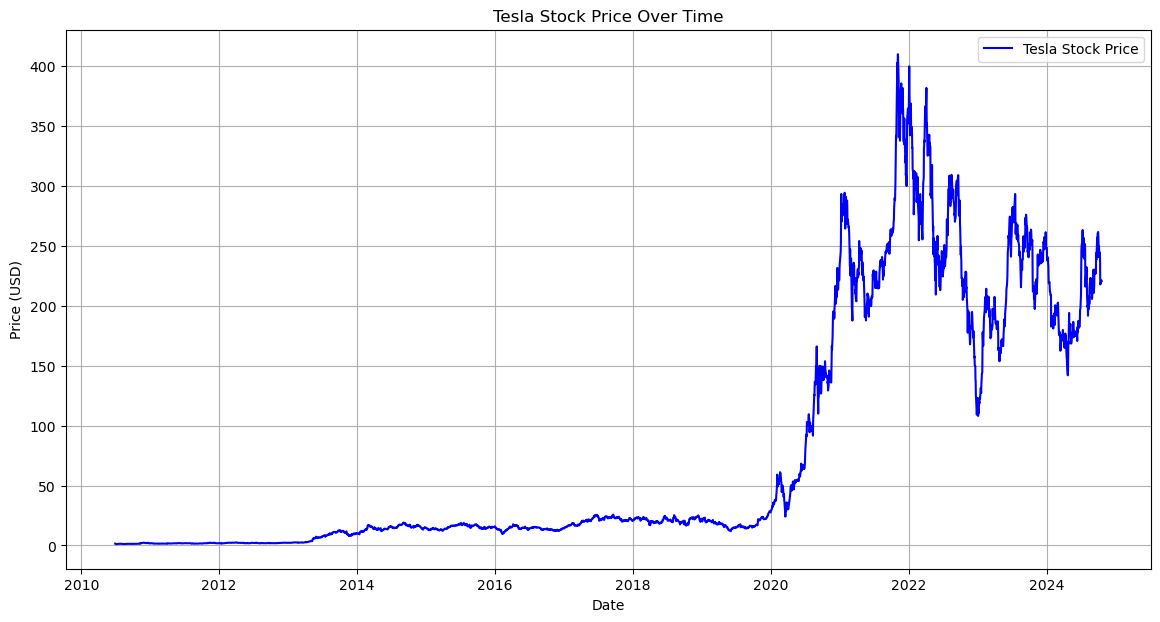

In [16]:
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Create a Ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Step 2: Get historical stock data
tesla_data = tesla.history(period="max")

# Step 3: Define the make_graph function
def make_graph(data):
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Close'], label='Tesla Stock Price', color='blue')
    plt.title('Tesla Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid()
    plt.show()

# Step 4: Call the make_graph function to plot the graph
make_graph(tesla_data)


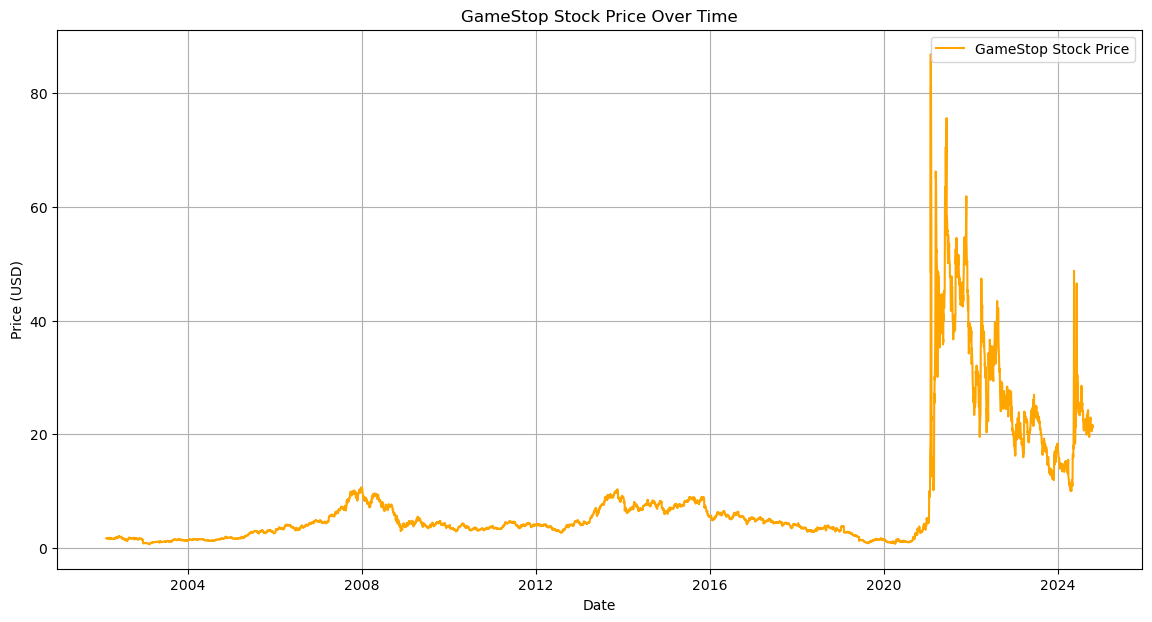

In [18]:
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Create a Ticker object for GameStop
gme = yf.Ticker("GME")

# Step 2: Get historical stock data
gme_data = gme.history(period="max")

# Step 3: Define the make_graph function
def make_graph(data):
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Close'], label='GameStop Stock Price', color='orange')
    plt.title('GameStop Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid()
    plt.show()

# Step 4: Call the make_graph function to plot the graph
make_graph(gme_data)
